In [1]:
einpta_dir='/home/user1/Desktop/comparison/EPTAWM3/HD-weight/epta+inpta/latest_results/Full-crn-hd-reweighted/'
epta_dir='/home/user1/Desktop/comparison/EPTAWM3/full/chains_ep_chen/hd_pl/'

In [2]:
import numpy as np
import os, glob, json, sys, pickle
import optparse
from chainconsumer import ChainConsumer

In [3]:
term='hd_full'

In [4]:
script_loc='/home/user1/Desktop/comparison/'
import sys, os
from getdist import plots, MCSamples
from getdist.gaussian_mixtures import GaussianND
import getdist
getdist.chains.print_load_details = False
import scipy
import matplotlib.pyplot as plt
import IPython
from IPython.display import Markdown
import numpy as np
import seaborn as sns
# import the tensiometer tools that we need:
import tensiometer
from tensiometer import utilities
from tensiometer import gaussian_tension
from tensiometer import mcmc_tension
import pandas as pd
sys.path.append(script_loc)
from diff_chain import  Diff_chain_shift

2023-04-16 05:08:30.141330: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-16 05:08:30.175839: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-16 05:08:30.176690: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-16 05:08:30.735052: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
mask = np.asarray(np.loadtxt(einpta_dir+'mask.txt'),dtype=bool)
Nsamples = len(mask)
pars = np.loadtxt(einpta_dir+'pars.txt',dtype=str)
ndim = len(pars)
chain_log = np.loadtxt(einpta_dir+"chain_1.txt")[-Nsamples:,np.append(np.arange(ndim),ndim+1)]
# use the mask to remove the bad chain points who did not match the likelihood when running the reweighting with crn
chain_log = chain_log[mask,:]
# load weights
weights_1 = np.loadtxt(einpta_dir+"weights.txt")

In [6]:
einpta_2=chain_log[:,-3:].T
einpta=[einpta_2[0],einpta_2[1]]

In [7]:
names_red = ['gamma_R','logA_R']
labels_red=['\gamma_{R}','\log A_{R}']
del_names=['delta_gamma_R','delta_logA_R']

In [8]:
einpta_red=MCSamples(samples=np.array(einpta).transpose(),loglikes=einpta_2[2],weights=weights_1,names=names_red,labels=labels_red,label='DR2full+')

In [9]:
par_epta=pd.read_csv(epta_dir+'pars.txt', header = None)
lf=len(par_epta)
par_epta;

In [10]:
epta_1=np.loadtxt(epta_dir+'chain_1.txt',usecols=(lf-2,lf-1,-3))

In [11]:
epta=epta_1.T[0:2]

In [12]:
epta_red=MCSamples(samples=np.array(epta).transpose(),loglikes=epta_1.T[-1],names = names_red,labels=labels_red,label='DR2full')


In [13]:
if not os.path.exists('./Figures'):
        os.mkdir('./Figures')

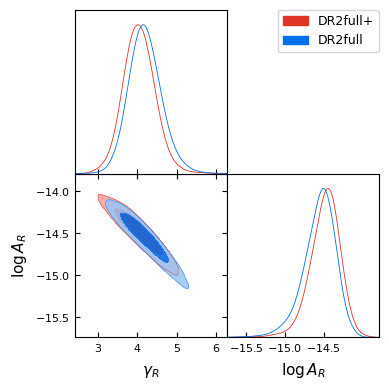

In [14]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([einpta_red,epta_red], filled=True)
plt.savefig('./Figures/'+term+'.png',dpi=300)
plt.show()

In [15]:
def plot_diff_chain(A1,A2,lims=None):
    diff_chain, nsig, shift_lower, shift_upper=Diff_chain_shift(A1,A2)
    
    shift_probability=utilities.from_sigma_to_confidence(nsig)
    g = plots.get_single_plotter()
    diff_chain.updateSettings({'contours': [shift_probability,0.68, 0.95]})
    g.settings.num_plot_contours = 3
    g.plot_2d(diff_chain,param1=del_names[0], param2=del_names[1], solid_colors='r',filled=True,lims=lims)
    g.add_legend([ A1.getLabel()+' vs '+A2.getLabel()+ 
                  '\n\n $\Delta=$'+str("{:.3f}".format(nsig))+'$\sigma$'], colored_text=True);
    g.add_x_marker(0)
    g.add_y_marker(0)
    plt.savefig('./Figures/'+'diff_'+term+A1.getLabel()+'_'+A2.getLabel()+'.png',dpi=300)
    
    return diff_chain,shift_probability

(<getdist.mcsamples.MCSamples at 0x7f2a16a25370>, 0.05522823627502426)

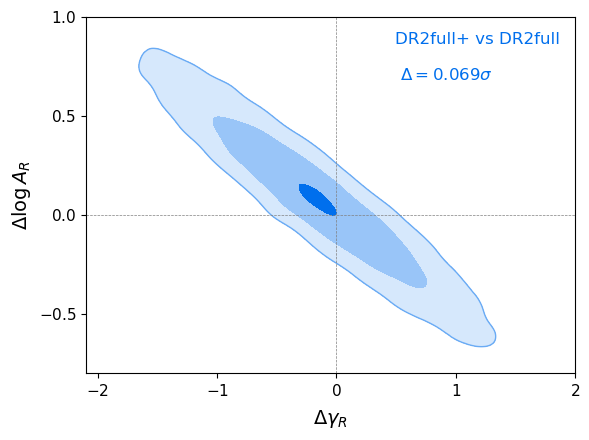

In [16]:
plot_diff_chain(einpta_red,epta_red,lims=[-2.1,2,-0.8,1])